`pytree`의 `flatten`, `unflatten`과정을 보고 `jax.tree.map` 과정과 관련지어 생각한다

In [1]:
import jax
from jax.tree_util import register_pytree_node

In [2]:
class Special1(object):
  def __repr__(self):
    return "Special1(x={}, y={})".format(self.x, self.y)

  def __init__(self, x, y):
    self.x = x
    self.y = y

def special_flatten1(v):
  children = (v.x, v.y)
  aux_data = None
  return (children, aux_data)

def special_unflatten1(aux_data, children):
  return Special1(*children)

# Global registration
register_pytree_node(
    Special1,
    special_flatten1,
    special_unflatten1
)

In [3]:
jax.tree.map(lambda x: x + 1,
  [
   Special1(0, 1),
   Special1(2, 4),
  ])

[Special1(x=1, y=2), Special1(x=3, y=5)]

In [4]:
jax.tree.leaves([
    Special1(0, 1),
    Special1(2, 4)
])

[0, 1, 2, 4]

In [5]:
class Special2(object):
  def __repr__(self):
    return "Special2(x={}, y={}, z={})".format(self.x, self.y, self.z)

  def __init__(self, x, y):
    self.x = x
    self.y = y
    self.z = y + 1

def special_flatten2(v):
  children = (v.x, v.y)
  aux_data = None
  return (children, aux_data)

def special_unflatten2(aux_data, children):
  return Special2(*children)

# Global registration
register_pytree_node(
    Special2,
    special_flatten2,
    special_unflatten2
)

In [6]:
jax.tree.map(lambda x: x + 1,
  [
   Special2(0, 1),
   Special2(2, 4),
  ])

[Special2(x=1, y=2, z=3), Special2(x=3, y=5, z=6)]

In [7]:
jax.tree.leaves([
    Special2(0, 1),
    Special2(2, 4)
])

[0, 1, 2, 4]

In [8]:
class Special3(object):
  def __repr__(self):
    return "Special3(x={}, y={}, z={})".format(self.x, self.y, self.z)

  def __init__(self, x, y):
    self.x = x
    self.y = y
    self.z = y + 1

def special_flatten3(v):
  children = (v.x, v.y, v.z)
  aux_data = None
  return (children, aux_data)

def special_unflatten3(aux_data, children):
  return Special3(*children)

# Global registration
register_pytree_node(
    Special3,
    special_flatten3,
    special_unflatten3
)

In [9]:
# jax.tree.map(lambda x: x + 1,
#   [
#    Special3(0, 1),
#    Special3(2, 4),
#   ])

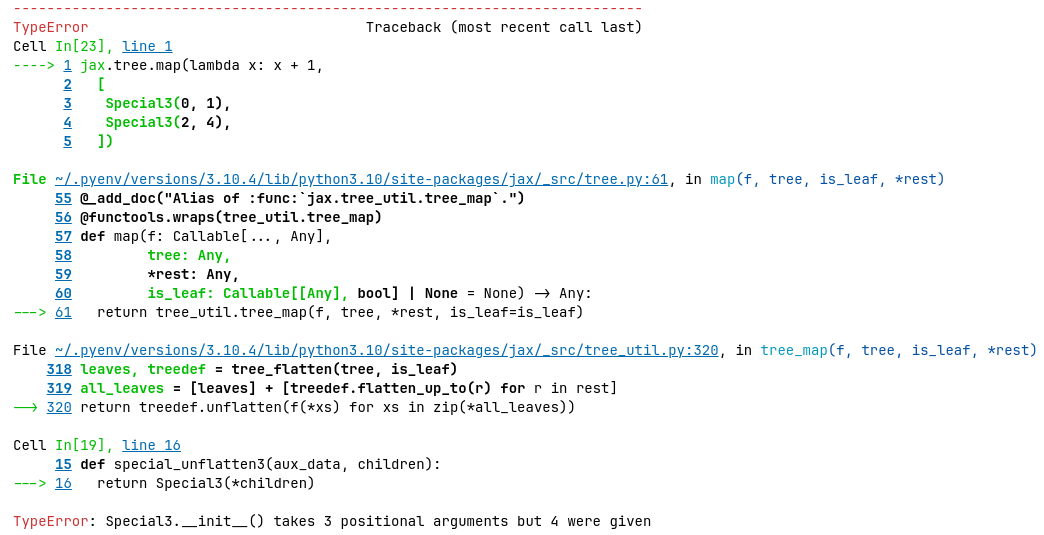

`jax.tree.map`을 하면서 flatten을 하고 연산 후에 `unflatten`을 하기 위해 집어넣으므로 4개의 argument가 given된다

In [10]:
jax.tree.leaves([
    Special3(0, 1),
    Special3(2, 4)
])

[0, 1, 2, 2, 4, 5]